# 막다운 숨기기

In [18]:
# 열정 열정 열정
# Max_iter 무한루프 방지법 

K means ( K 평균 )  
   
군집중심점을 임의 선택 - 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법  
반복적인 프로세스를 통해 포인트의 평균지점으로 계속해 이동한다

Mean shift ( 평균이동)  

거리중심이 아닌 데이터의 밀도를 찾아가면서 군집 중심점 이동  
컴퓨터 비전영역 이미지나 영상 데이터에서 특정 개체 구분 및 움직임 추적

DBSCAN 정리할것 

## K 평균 실습

In [19]:
# 처음에는 군집했다가 중심점 이동 

# 군집화 CLustering - K means Algorithm

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* iris Data

In [21]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

K means 모델 생성 /학습

In [23]:
from sklearn.cluster import KMeans # 첫등장 케이민즈
Kmeans = KMeans(n_clusters=3, random_state=2021)

In [24]:
# x만 fit 학습하고 있는데 비 지도학습이므로 y값 없는게 당연
Kmeans.fit(iris_std)  # fit이야 비지도학습중. y값 없어

KMeans(n_clusters=3, random_state=2021)

In [25]:
Kmeans.labels_   # 첫등장 케이민즈 라벨
                # 세토사 0 버지칼라 1 버지니카 2 는 알파벳 순인데 
                # 라벨친구는 아무렇게나 그룹핑 후 라벨링.. ? 무슨의미가 있나?

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [26]:
np.unique(Kmeans.labels_, return_counts=True) 

(array([0, 1, 2]), array([47, 50, 53], dtype=int64))

In [27]:
# df 로 정리
df = pd.DataFrame({
    'target':iris.target, 'PC1':iris_pca[:,0],
    'PC2' :iris_pca[:,1], 'cluster':Kmeans.labels_
})

df.head()

,target,PC1,PC2,cluster
0,0,-2.264703,0.480027,1
1,0,-2.080961,-0.674134,1
2,0,-2.364229,-0.341908,1
3,0,-2.299384,-0.597395,1
4,0,-2.389842,0.646835,1


In [28]:
## 연습연습. 
df.groupby(['target','cluster']).count()
# 버지칼라와 버지니카는 잘 구분 안되서 섞여 있는 정도?

PC1  PC2
target cluster          
0      1         50   50
1      0         11   11
       2         39   39
2      0         36   36
       2         14   14

- 데이터 시각화
 -  군집화와 차원축소한 것으로 시각화 

In [29]:
# 군집화된 결과를 차원축소로 시각화 2차원

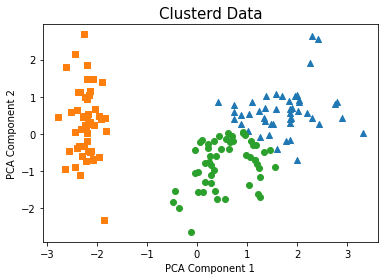

In [30]:
markers = ['^', 's', 'o']
for i, marker in enumerate(markers):
    x_data = df[df.cluster == i]['PC1']
    y_data = df[df.cluster == i]['PC2']
    plt.scatter(x_data, y_data, marker = marker)

plt.title('Clusterd Data', fontsize=15)
# plt.legend()////
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

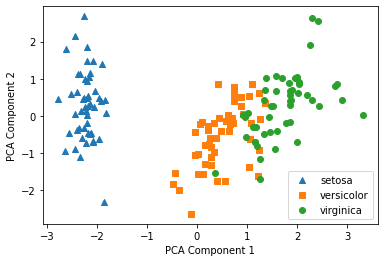

In [31]:
for i, marker in enumerate(markers):
    x_data = df[df.target == i]['PC1']
    y_data = df[df.target == i]['PC2']
    plt.scatter(x_data, y_data, marker = marker , label = iris.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

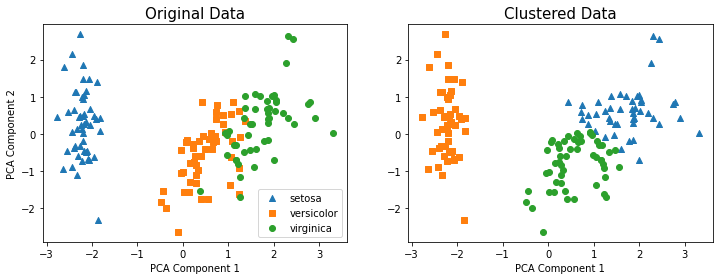

In [36]:
# 검증은 점심먹고 
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# 하나의 그림으로 그리려면, 먼저 두 개의 그래프 중에서 어떤 것이 차이가 나는지 알아야 한다. 
# 조건 필터링 거는 부분이 다르다!

for k, column in enumerate(['target', 'cluster']):
    ax = axs[k]     # row가 1이기 때문에, 인덱스가 하나만 필요하다.
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        ax.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])
    
    if column == 'target':
        ax.legend()
        ax.set_title('Original Data', fontsize=15)
        ax.set_ylabel('PCA Component 2')
    else:
        ax.set_title('Clustered Data', fontsize=15)

    ax.set_xlabel('PCA Component 1')
    

plt.show()

두개의 그림 비교 

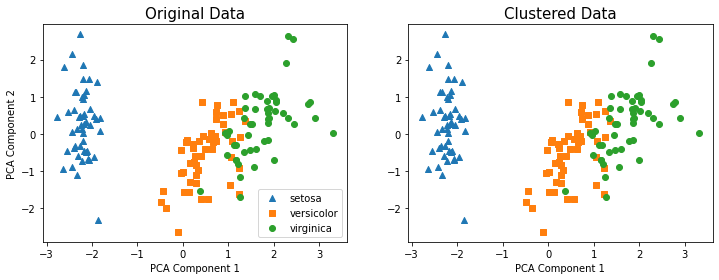

In [38]:
_, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for k, column in enumerate(['target', 'cluster']):
    ax = axs[k]
    for i , marker in enumerate(markers):
            x_data = df[df.target == i]['PC1']
            y_data = df[df.target == i]['PC2']
            ax.scatter(x_data, y_data, marker = marker , label = iris.target_names[i])

    if column == 'target':
        ax.legend()
        ax.set_title('Original Data', fontsize=15)
        ax.set_ylabel('PCA Component 2')
    else:
        ax.set_title('Clustered Data', fontsize=15)

    ax.set_xlabel('PCA Component 1')
plt.show()



# _, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# # 하나의 그림으로 그리려면, 먼저 두 개의 그래프 중에서 어떤 것이 차이가 나는지 알아야 한다. 
# # 조건 필터링 거는 부분이 다르다!

# for k, column in enumerate(['target', 'cluster']):
#     ax = axs[k]     # row가 1이기 때문에, 인덱스가 하나만 필요하다.
#     for i, marker in enumerate(markers):
#         x_data = df[df[column] == i]['PC1']
#         y_data = df[df[column] == i]['PC2']
#         ax.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])
    
#     if column == 'target':
#         ax.legend()
#         ax.set_title('Original Data', fontsize=15)
#         ax.set_ylabel('PCA Component 2')
#     else:
#         ax.set_title('Clustered Data', fontsize=15)

#     ax.set_xlabel('PCA Component 1')
    

# plt.show()

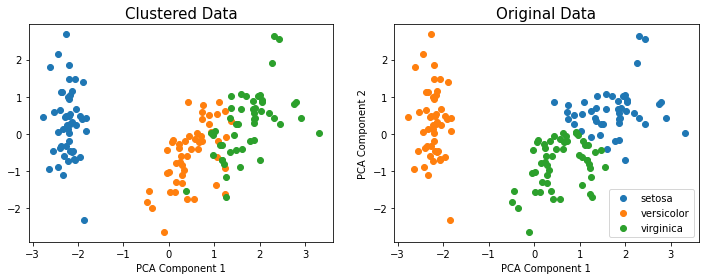

In [35]:
plt.figure(figsize=(12,4))
for k, column in enumerate(['target', 'cluster']):
    plt.subplot(1,2,k+1)
    for i ,maker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        plt.scatter(x_data, y_data, marker = marker , label = iris.target_names[i])

    if k == 1:   # target
        plt.legend()
        plt.title('Original Data', fontsize=15)
        plt.ylabel('PCA Component 2')
    else : 
        plt.title('Clustered Data', fontsize=15)

    plt.xlabel('PCA Component 1')
plt.show()
